

# Project: Investigating the Dataset No-show Appointments
 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil.

A number of characteristics about the patient are
included in each row.


01 - PatientId 
   Identification of a patient

02 - AppointmentID
   Identification of each appointment(was later dropped)

03 - Gender
  Male or Female. 

04 - ScheduledDay
   The day of the actuall appointment, when they have to visit the doctor.
    
05 - AppointmentDay
  The day someone called or registered the appointment, this is before appointment of course.
    
06 - Age
   How old is the patient.
    
07 - Neighbourhood
    Where the appointment takes place.
    
08 - Scholarship
    True of False .
    
09 - Hipertension
    True or False
    
10 - Diabetes
    True or False
    
11 - Alcoholism
    True or False

12 - Handcap
   True or False

13 - SMS_received
        1 or more messages sent to the patient.
        
14 -No-show

True or False.

## Questions

The following questions would be asked and answered in this notebook

    1. Does Gender have any effect of Appointment attandance
    2. How does been on or without scholarship affect attendance to appointment 

In [1]:
#importing the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime as dt

df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [2]:
#Displaying the first 5 entries

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

    Here i'm going to view the general properties of the data,check for missing data,check if the datatypes are in the right formart.

    Also a brief description of what the dataset contians



### General Properties

In [3]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### 
1.  No data seems to be missing.
2.  Theres is negative age preset which would be dealt with later on. 


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

 Since there are  62,299 patient id and there are 110,527 appointments that means some  patients had multiple appointments with their doctor
 
  
    1. ScheduledDay and AppointmentDay   needs to be in date datatype
    2. AppointmentID wont be needed anymore



### Data Cleaning 
1. Colunms head needs to all be in lower case for consistency
2. Dopped AppointmentID colunm
3. change the datatype of appointmentday and scheduledday to date and time

In [6]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [7]:
#changing colunms to lower case
df.columns = df.columns.str.lower()

In [8]:
#Confirming changes
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [9]:
#droping appointmentid colunms 
df.drop("appointmentid",axis=1,inplace=True)

        Since scheduledday and appointmentday are both in object data type, i'm creating a function that converts the dates from object to datetime datatype 

In [10]:
#Function to convert from Object data type to date datatype
# 
# obj_todate returns datetype formart instead

def obj_todate(date):
    return (pd.to_datetime(date))

In [11]:
#Applying the function to covert from object to datetime type

df['scheduledday'] = df['scheduledday'].apply(lambda x: obj_todate(x))
df['appointmentday'] = df['appointmentday'].apply(lambda x: obj_todate(x))





In [12]:
#confirming changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  float64            
 1   gender          110527 non-null  object             
 2   scheduledday    110527 non-null  datetime64[ns, UTC]
 3   appointmentday  110527 non-null  datetime64[ns, UTC]
 4   age             110527 non-null  int64              
 5   neighbourhood   110527 non-null  object             
 6   scholarship     110527 non-null  int64              
 7   hipertension    110527 non-null  int64              
 8   diabetes        110527 non-null  int64              
 9   alcoholism      110527 non-null  int64              
 10  handcap         110527 non-null  int64              
 11  sms_received    110527 non-null  int64              
 12  no-show         110527 non-null  object             
dtypes: datetime64[

#### Wating Time
    Calculating the difference between appointmentday and the scheduledday to get the waiting time

In [13]:

df["wait_time"] = (df["appointmentday"].dt.date - df["scheduledday"].dt.date ).dt.days


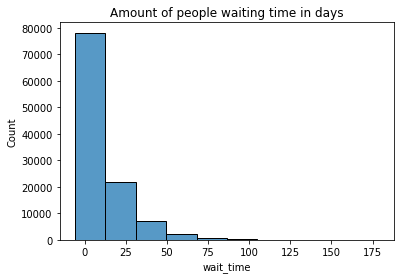

In [14]:
#An Histgram for waiting time

sns.histplot(df.wait_time,bins=10)
plt.title("Amount of people waiting time in days");


#### Calculated the difference between the appointment and scheduled day
    Most people have their waiting days between 0 and 25 days while a few people have more than that.


#### Locating and removing the person with negative age value

In [15]:


negative_age = df[df['age']<0].index
df.drop(negative_age,axis=0, inplace=True)
df[df['age']<0]

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,wait_time


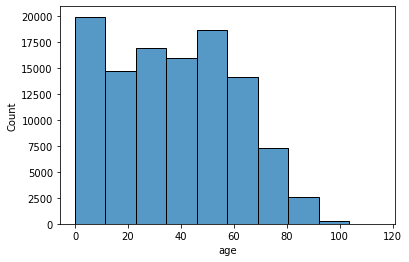

In [16]:
sns.histplot(x="age",data=df,bins =10);


#### An Histogram showing the age distribution
#### Result
    1. According to the histogram, the age ranges between 0 - 120 years
    2. Kids of 0 years of age seems to be the ones with the most appointment with the doctor

<a id='eda'></a>
## Exploratory Data Analysis



### Q1. Does Gender have any effect of Appointment attandance
    Does more number means most
    

In [17]:
df.head(1)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,wait_time
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0


In [18]:
#Male Percentage

male = df.gender.value_counts()[1]
male_percent = ((male / df.shape[0]) * 100)
male_percent = np.floor(male_percent)
male_percent  

35.0

In [19]:
#Female percentage

female = df.gender.value_counts()[0]
female_percent = ((female / df.shape[0]) * 100)
female_percent =np.ceil(female_percent)
female_percent

65.0

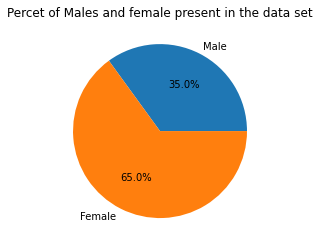

In [20]:
#Constructing a pie chart for Gender

gender_percent = (male_percent,female_percent)
plt.pie(x=gender_percent,labels=("Male","Female"),
        autopct='%1.1f%%')

plt.title("Percet of Males and female present in the data set");

### A Pie chart containing the result of male to female ratio

    Females tends to have an appointment the most since they have 65% of the appointments while males holds the remaining 35%

### Diving into how Gender affects the attendance of the appointments

In [21]:
#A little summary of Gender Show/No Show

gender_dist = df.groupby('gender')['no-show'].value_counts()


gender_dist

gender  no-show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: no-show, dtype: int64

In [22]:
female_attended = gender_dist['F'][0]
print(female_attended,'Showed')

female_notattend= gender_dist['F'][1]
print(female_notattend,'Did not show')


57245 Showed
14594 Did not show


In [23]:
male_attended = gender_dist['M'][0]
print(male_attended,'present')

male_notattend= gender_dist['M'][1]
print(male_notattend,'not present')


30962 present
7725 not present


#### It shows right here that 
    For the Females, 57,245 attended the interview while 14,594 didnt show
    And for the Males 30,962 show up and 7,725 did not show

### Pictorial Representation of Attendance by Gender
    Choosing a bar chart here to show if theres any relationship between the number of people who were present and  also  for those who were not present 

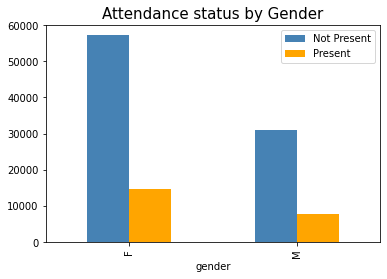

In [24]:
#bar chart for Attendance status by Gender


gender_dist.unstack().plot(kind='bar',stacked=False,
                 color=['steelblue', 'orange']);
                


plt.legend(['Not Present','Present'])
plt.title('Attendance status by Gender',fontsize=15);



#### Results

    
    Well the Female present/Not Present bar is pretty much the same trend as the one for the makle counterpart only double the amount.

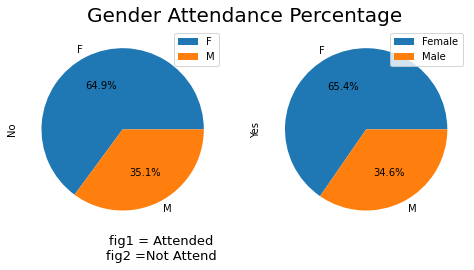

In [25]:
#Pie chart for Gender Attendance Percentage
gender_dist.unstack().plot(kind='pie',subplots=True,
                autopct='%1.1f%%',figsize=(8,9))


plt.legend(['Female','Male'])
plt.xlabel('fig1 = Attended \nfig2 =Not Attend '
          ,fontsize=13,x=-0.5)

plt.title('Gender Attendance Percentage',
         x=-0.1,y=1,fontsize=20);


#### A pie chart comparing the ratio of Attended to Not Attended

##### Results
    The difference between those who attended and those who didn't is less than 3%.
    So its safe to say Gender a very little to no impact on someone attending their appointment

## Q2. How does been on or without scholarship affect attendance to appointment 
    Since some people are on scholarship, this section is dedicated to finding out the attendance rate of those on scholarship to those without

In [26]:
total_patient = df.shape[0]
scholarships = df.scholarship.value_counts() 
scholarships


0    99665
1    10861
Name: scholarship, dtype: int64

 
    99,665 people are Not on scholarship
    while the remaining 10861 are on it.

In [27]:
#calculating percent

scholarship_percent = (scholarships / total_patient) * 100
scholarship_percent

0    90.173353
1     9.826647
Name: scholarship, dtype: float64

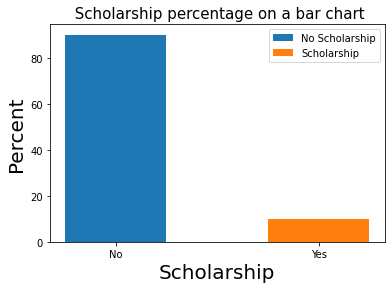

In [28]:
#Creating a bar char for the appointmenst on scholarships


no_scholarship_bar = plt.bar(0, scholarship_percent[0], width=.5,  label='No Scholarship' )
scholarship_bar = plt.bar(1, scholarship_percent[1], width=.5,  label='Scholarship')

plt.xticks([0, 1], ['No', 'Yes'])
plt.xlabel('Scholarship', fontsize=20)
plt.ylabel('Percent', fontsize=20)
plt.title(' Scholarship percentage on a bar chart',fontsize=15);
plt.legend();

### A bar chart  showing the Percent of people on scholarships 

### Result

    Only a few of the appointments were sponsored

In [29]:
#Brief Summary of the appointment with and without scholarship
scholarship_dist = df.groupby('scholarship')['no-show'].value_counts()
scholarship_dist


scholarship  no-show
0            No         79924
             Yes        19741
1            No          8283
             Yes         2578
Name: no-show, dtype: int64

##### QuickStats
    79,924 patients without scholarship showed for appointment
    19,741 patients without scholarship did not show for appointment
    8283 patients with scholarship showed for appointment
    2578 patients with scholarship did not show for appointment

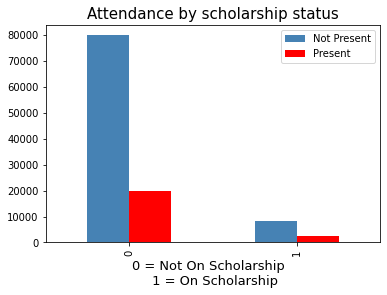

In [30]:
#Bar chart for Attendance by scholarship status


scholarship_dist.unstack().plot(kind='bar',stacked=False,
                 color=['steelblue', 'red']);
                


plt.legend(['Not Present','Present']);

plt.xlabel('0 = Not On Scholarship  \n 1 = On Scholarship'
          ,fontsize=13)
plt.title('Attendance by scholarship status',
         fontsize=15);



### Bar chart Results
    The chart for those without scholarship dwarfs those on scholarship
    
    Those who dont have scholarship and did not attend the appointments is twice the size of those on scholarship who attended

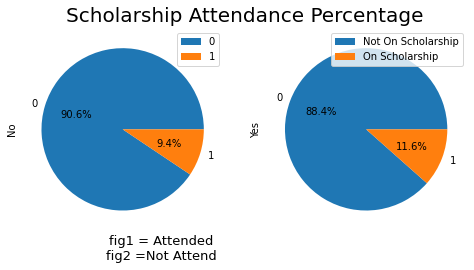

In [31]:
scholarship_dist.unstack().plot(kind='pie',subplots=True,
                autopct='%1.1f%%',figsize=(8,9))


plt.legend(['Not On Scholarship','On Scholarship'])
plt.xlabel('fig1 = Attended \nfig2 =Not Attend '
          ,fontsize=13,x=-0.5)


plt.title('Scholarship Attendance Percentage',
         x=-0.1,y=1,fontsize=20);


#### Pie Chart Results
    The chart once again confirms the fact that only a little amount of patient are on scholarship
    
    It also confirms that scholarship has only a little effect on who attends appointments

<a id='conclusions'></a>
## Conclusions

###  Results
      It shows clearly the Females tends to see the doctors more than their malecounterpart.And that was only possible due to their numbers, But when you compare the ratio,you see there is little too no difference in who sees the doctor the most.


    A few percentage of patient were sponsored for the appointments. While that might seem like a good reason for people who are sponsored not to miss their appointments,It just wasn't. Been sponsored makes a very little difference in attending appointments

###  Limitations
    1. The ratio of male to female in the data is not balanced so there will probably be a bias towards the females
    2.Cannot show strong correlations between factors since my analysis is on  categorical data.
